<a href="https://colab.research.google.com/github/debbytech22/Portfolio_project/blob/master/Kaggle_Car_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TABLE OF CONTENT


*   Intoduction
*   Exploratory Data Analysis Of Train Data Set
*   Data Preprocessing of the Train Dataset
*   Modelling the train dataset
*   Data Preprocessing of the Test Data Set


INTRODUCTION

AIM: The model was built to predict the price of used cars.

Data source:[Used Car Price Predictions Dataset ](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset)







In [1]:
!pip install category_encoders

In [2]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce


In [3]:
# read the train and test dataset as a dataframe
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [4]:
# check the first 5 rows
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [5]:
train_df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [6]:
train_df.duplicated().sum()

0

 EXPLORATORY DATA ANALYSIS OF TRAIN DATA SET

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'milage'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

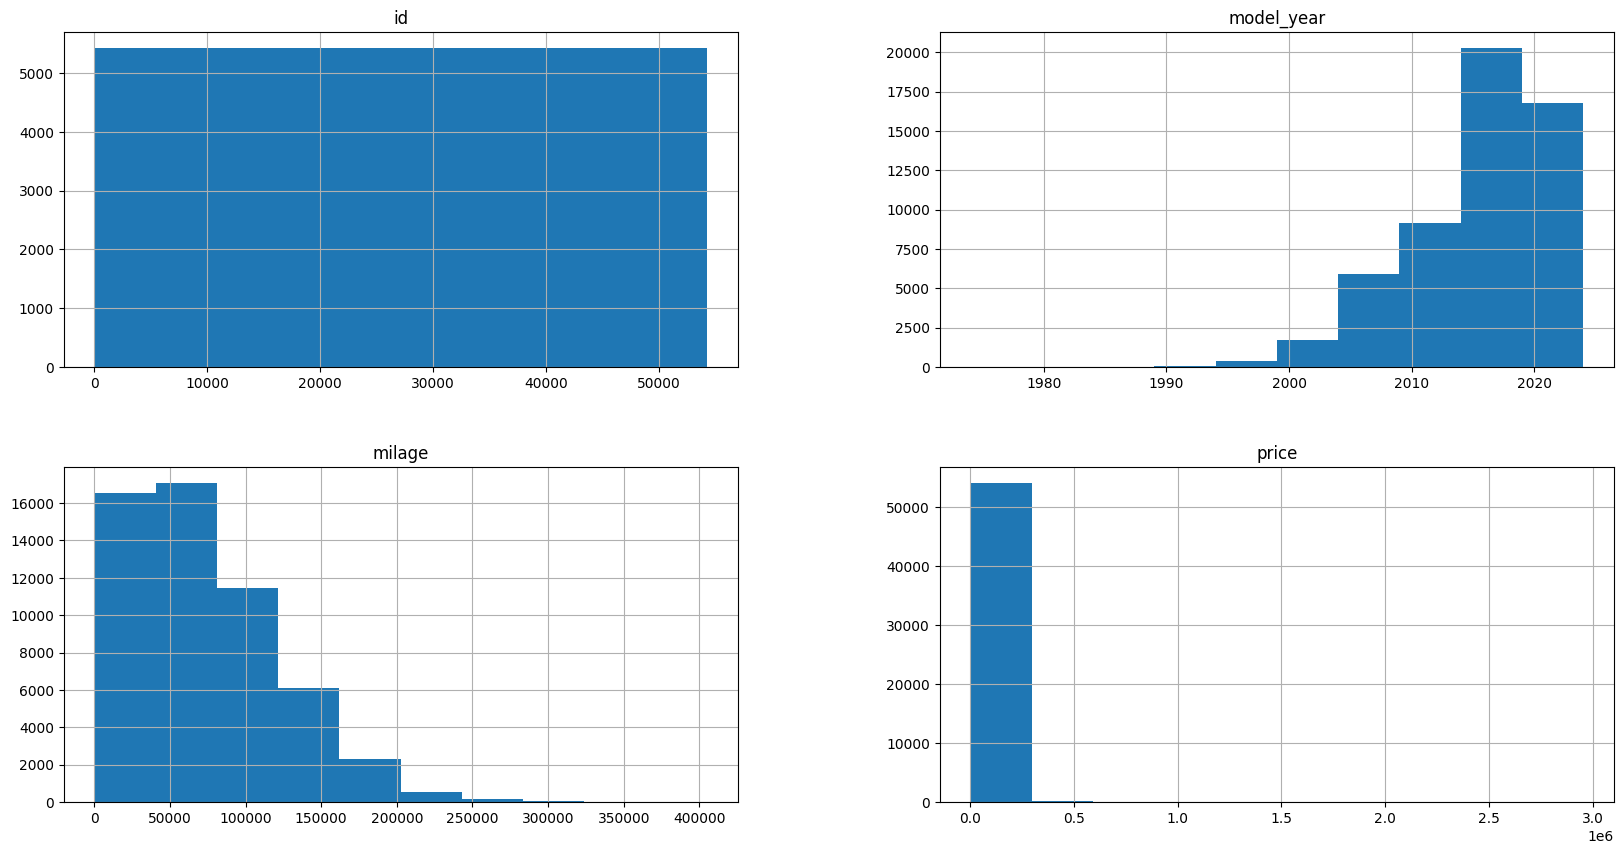

In [17]:
train_df.hist(figsize=[20,10])

The visual shows that milage and price are positively skewed,model_year is negatively skewed. This will affect the result of our predictions, we shall take the log of these columns.

DATA PREPROCESSING OF THE TRAIN DATASET

In [7]:
# take the log of price,milage, and model year columns
train_df['price']=train_df['price'].apply(lambda x : np.log(x+1))
train_df['milage']=train_df['milage'].apply(lambda x : np.log(x+1))
train_df['model_year']=train_df['model_year'].apply(lambda x : np.log(x+1))

In [18]:
train_df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

We have a lot of categorical features, I shall use binary encoder to convert some of them to numerical format for modelling because the features have up to 50 categories.

In [19]:
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [8]:
# fuel type has an unusual value '-' which I replaced with 'None'
train_df['fuel_type'] = train_df['fuel_type'].apply(lambda x: 'None' if x == '–' else x)

In [9]:
binary_encoder = ce.BinaryEncoder(cols=['transmission'])
train_df = binary_encoder.fit_transform(train_df)


In [10]:
binary_encoder = ce.BinaryEncoder(cols=['accident'])
train_df = binary_encoder.fit_transform(train_df)

In [11]:
binary_encoder = ce.BinaryEncoder(cols=['fuel_type'])
train_df = binary_encoder.fit_transform(train_df)

In [12]:
binary_encoder = ce.BinaryEncoder(cols=['brand'])
train_df = binary_encoder.fit_transform(train_df)

In [13]:
train_df.head()

,id,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,model,model_year,milage,...,transmission_2,transmission_3,transmission_4,transmission_5,ext_col,int_col,accident_0,accident_1,clean_title,price
0,0,0,0,0,0,0,1,F-150 Lariat,7.610358,11.216539,...,0,0,0,1,Blue,Gray,0,1,Yes,9.305741
1,1,0,0,0,0,1,0,335 i,7.604894,11.289794,...,0,0,1,0,Black,Black,0,1,Yes,9.018090
2,2,0,0,0,0,1,1,XF Luxury,7.605890,11.424007,...,0,0,1,1,Purple,Beige,0,1,Yes,9.615872
3,3,0,0,0,0,1,0,X7 xDrive40i,7.612337,7.798933,...,0,1,0,0,Gray,Brown,0,1,Yes,11.058811
4,4,0,0,0,1,0,0,Firebird Base,7.601902,11.617294,...,0,1,0,1,White,Black,0,1,Yes,8.968396


In [14]:
# drop some features that are not relevant, majorly features with up to 1000 different categories or features with only a single value
train_df.drop(['id','model','ext_col','int_col','clean_title','engine'], axis=1,inplace =True)
train_df.head(3)

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,model_year,milage,fuel_type_0,fuel_type_1,fuel_type_2,transmission_0,transmission_1,transmission_2,transmission_3,transmission_4,transmission_5,accident_0,accident_1,price
0,0,0,0,0,0,1,7.610358,11.216539,0,0,1,0,0,0,0,0,1,0,1,9.305741
1,0,0,0,0,1,0,7.604894,11.289794,0,0,1,0,0,0,0,1,0,0,1,9.018090
2,0,0,0,0,1,1,7.605890,11.424007,0,0,1,0,0,0,0,1,1,0,1,9.615872


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_0         54273 non-null  int64  
 1   brand_1         54273 non-null  int64  
 2   brand_2         54273 non-null  int64  
 3   brand_3         54273 non-null  int64  
 4   brand_4         54273 non-null  int64  
 5   brand_5         54273 non-null  int64  
 6   model_year      54273 non-null  float64
 7   milage          54273 non-null  float64
 8   fuel_type_0     54273 non-null  int64  
 9   fuel_type_1     54273 non-null  int64  
 10  fuel_type_2     54273 non-null  int64  
 11  transmission_0  54273 non-null  int64  
 12  transmission_1  54273 non-null  int64  
 13  transmission_2  54273 non-null  int64  
 14  transmission_3  54273 non-null  int64  
 15  transmission_4  54273 non-null  int64  
 16  transmission_5  54273 non-null  int64  
 17  accident_0      54273 non-null 

In [16]:
# select all the column names except the last column which is the target feature
cols=list(train_df.columns)
cols=cols[:-1]

In [17]:
# set the target feature as y and independent variables as X
y=train_df['price']
X=train_df[cols]
X.shape

(54273, 19)

MODELLING THE DATA

In [18]:
# import some machine learning algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
#splitting the X and y data into train and validation set
X_train, X_val , y_train, y_val = train_test_split(X,y,test_size= .2,random_state=42 )

In [20]:
# standardize the values of all the columns to be on the same scale to
#prevent the model from attaching more importance to one more than another
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
# train the X_train and y_train on random forest regressor
model = RandomForestRegressor(n_estimators=300,bootstrap=True,max_depth = 10, max_features= 1.0, min_samples_leaf= 2, min_samples_split= 10, random_state=42)
model.fit(X_train, y_train)

#Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [22]:
#measure the accuracy of the model by taking the root mean square error of our prediction
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f"The root mean square value is {rmse}")


The root mean square value is 0.5103465200295398


In [23]:
# also measure the accuracy of the model by calculating the r2_score
r2_val = r2_score(y_val, y_val_pred)
print(f"The r2 score value is {r2_val}")



The r2 score value is 0.616045597851296


In [ ]:
y_val_pred[0:10]

array([11.06632473, 11.88384816,  8.85325227, 10.11459901,  8.81001179,
        9.30550819, 10.51826722, 10.54534971, 10.34171848, 10.70126951])

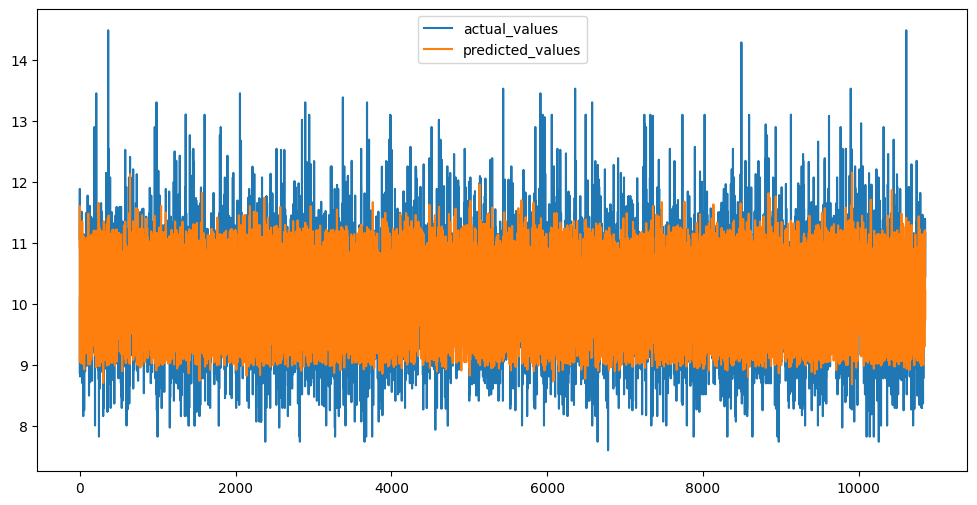

In [24]:
#visualizing the predicted values against the real values
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(y_val))],y_val, label='actual_values')
plt.plot([i for i in range(len(y_val))], y_val_pred, label ='predicted_values')
plt.legend()

DATA PREPROCESSIN OF THE TEST DATASET

Applying all the preprocessing steps used on the training data to the test data








In [25]:
test_df['fuel_type'] = test_df['fuel_type'].apply(lambda x: 'None' if x == '–' else x)

In [31]:
test_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission_0', 'transmission_1', 'transmission_2', 'transmission_3',
       'transmission_4', 'transmission_5', 'ext_col', 'int_col', 'accident_0',
       'accident_1', 'clean_title'],
      dtype='object')

In [32]:
binary_encoder = ce.BinaryEncoder(cols=['transmission'])
test_df = binary_encoder.fit_transform(test_df)


In [28]:
binary_encoder = ce.BinaryEncoder(cols=['accident'])
test_df = binary_encoder.fit_transform(test_df)

In [33]:
binary_encoder = ce.BinaryEncoder(cols=['fuel_type'])
test_df = binary_encoder.fit_transform(test_df)

In [34]:
binary_encoder = ce.BinaryEncoder(cols=['brand'])
test_df = binary_encoder.fit_transform(test_df)

In [35]:
test_df['milage']=test_df['milage'].apply(lambda x : np.log(x+1))
test_df['model_year']=test_df['model_year'].apply(lambda x : np.log(x+1))

In [36]:
new_test_df=test_df.copy()

In [37]:
new_test_df.drop(['id','model','ext_col','int_col','clean_title','engine'], axis=1,inplace =True)


In [38]:
test_cols=list(new_test_df.columns)
test_cols
new_test_df=new_test_df[test_cols]
new_test_df

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,model_year,milage,fuel_type_0,fuel_type_1,fuel_type_2,transmission_0,transmission_1,transmission_2,transmission_3,transmission_4,transmission_5,accident_0,accident_1
0,0,0,0,0,0,1,7.608374,11.198228,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,7.608871,11.760043,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,7.608871,10.858691,0,0,1,0,0,0,0,1,1,0,1
3,0,0,0,0,1,1,7.610358,10.292179,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,7.611348,11.407576,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,0,0,1,1,0,0,7.610853,8.412055,0,0,1,0,0,1,0,1,0,0,1
36179,0,0,0,1,0,1,7.603399,12.128117,0,0,1,0,0,0,1,1,0,1,0
36180,0,0,1,0,1,0,7.606885,11.661354,0,0,1,0,0,1,1,1,0,0,1
36181,0,1,0,1,1,0,7.610853,10.571343,0,0,1,0,0,1,0,1,0,0,1


In [39]:
# scaling the test dataset
X_test_scaled = scaler.transform(new_test_df)
#fit the test data to the model
y_test_pred = model.predict(new_test_df)

# Since we don't have the true labels for the test set, we can only output the predictions
print("Predictions on test set:")
print(y_test_pred)

Predictions on test set:
[ 9.87831175  9.92271738 10.33602038 ...  9.54026017 10.43680722
  9.18983319]


In [40]:
# chaing the predicted values from log form to real values
predictions = np.exp(y_test_pred)
predictions

array([19502.76921763, 20388.31826406, 30823.12122211, ...,
       13908.56575541, 34091.63127853,  9797.01657746])

In [ ]:
#save the predicted values as a CSV File
kaggle_dfff = pd.DataFrame({
    'id': test_df['id'],
    'price': predictions
})

# Save to CSV
kaggle_dfff.to_csv('predicted_car_price1.csv', index=False)

In [ ]:
# help download from colab environment to the desktop
from google.colab import files

files.download('predicted_car_price1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>